# Finance Data Project: EDA of Stock Prices

I will focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Import Data

Use Pandas to directly read data from Yahoo finance.

*Note: [we'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows us to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) 

Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

In [106]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()


## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. S


*** WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 

In [31]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [32]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", "yahoo", start, end)

# Goldman Sachs
GS = data.DataReader("GS", "yahoo", start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", "yahoo", start, end)

# Morgan Stanley
MS = data.DataReader("MS", "yahoo", start, end)

# Wells Fargo
WFC = data.DataReader("WFC", "yahoo", start, end)

#or 
# Could also do this for a Panel Object
# df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'google', start, end)

In [33]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,34.811729
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.442013
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,34.486385
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,34.434616
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,34.456806


#### Create a list of the ticker symbols (as strings) in alphabetical order

In [34]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

#### concatenate the bank dataframes together to a single data frame called bank_stocks

In [35]:
bank_stocks=pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers) #axis=0 row
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  34.811729   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.442013   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.486385   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.434616   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.456806   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  36.896912  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  36.922207  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  37.023464  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  37.061440  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  37.453743  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.324865  
2006-01-04  31.530001  10870000.0  20.089125  
2006-01-05  31.495001  10158000.0  20.066822  
2006-01-06  31.680000   8403800.0  20.184694  
2006-01-09  31.674999   5619600.0  20.181515  

[5 rows x 36 columns]

#### Set the column name levels

In [36]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [37]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.811729  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.442013  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.486385  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.434616  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.456806  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.896912  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.922207  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.023464  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.061440  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.453743  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.324865  
2006-01-04   31.799999  31.530001  10870000.0  20.089125  
2006-01-05   31.500000  31.495001  10158000.0  20.066822  
2006-01-06   31.580000  31.680000   8403800.0  20.184694  
2006-01-09   31.674999  31.674999   5619600.0  20.181515  

[5 rows x 36 columns]

# EDA

#### What is the max Close price for each bank's stock throughout the time period?

In [43]:
#method 1
for i in tickers:
    print(i, round(bank_stocks[i]['Close'].max(),3))

BAC 54.9
C 564.1
GS 247.92
JPM 70.08
MS 89.3
WFC 58.52


In [47]:
#method 2 using xs()-cross section method: go inside multilevel index
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

#### Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [54]:
returns=pd.DataFrame()

#### We can use pandas pct_change() method on the Close column to create a column representing this return value. 

In [55]:
for i in tickers:
    returns[i+' Return']=bank_stocks[i]['Close'].pct_change() 

In [56]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


#### What stock stands out to you? Can you figure out why? (use seaborn pairplot): they have corolation with each other

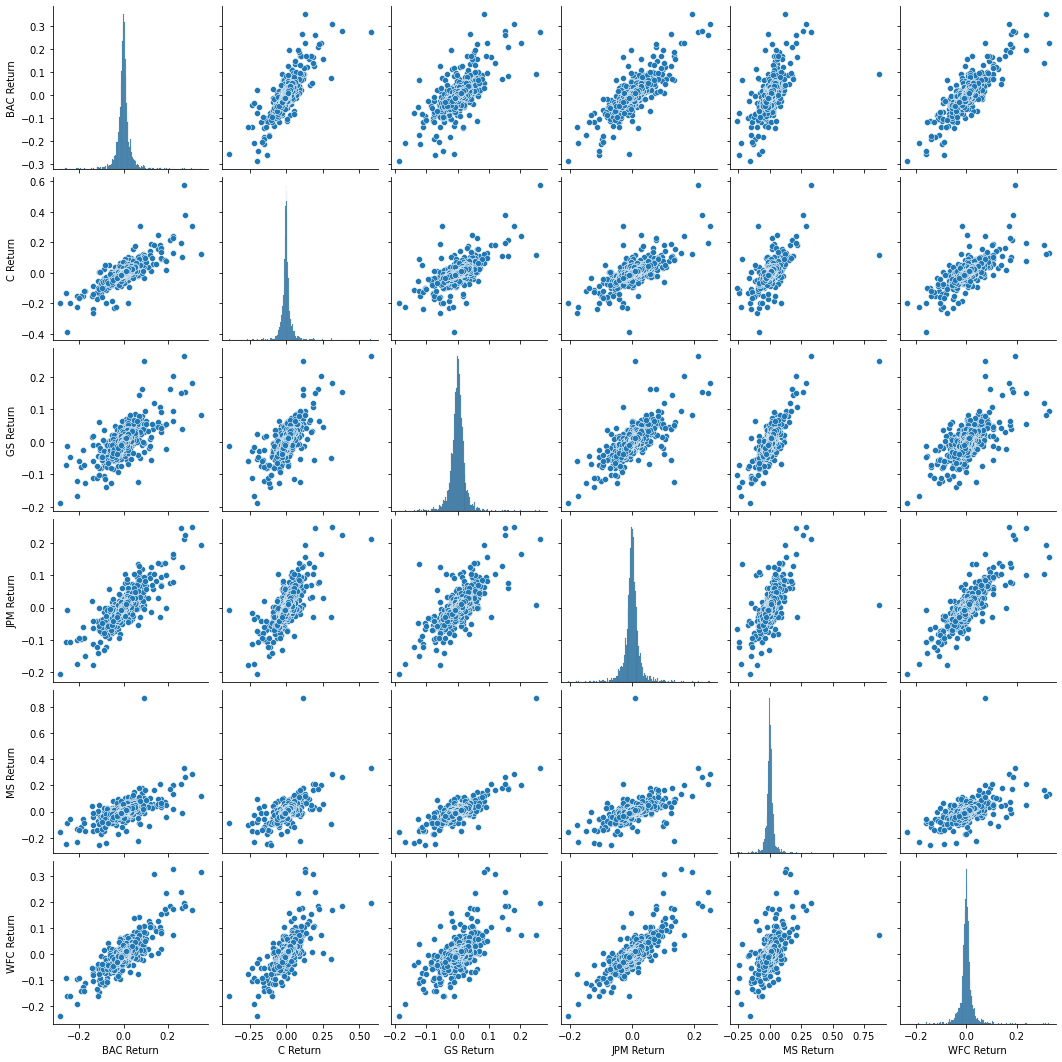

In [61]:
sns.pairplot(returns)

#### Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. 

4 of the banks share the same day for the worst drop, did anything significant happen that day? Barak Obama inaugural date

In [69]:
#min:
returns.min()
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [63]:
#max:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

#### The Citigroup's largest drop and biggest gain were very close to one another:

it is because of the anouncement of reverse stock split

### Riskiets stock can be determined based on STD()
large std: up and down risky
small std: stable

the same

In [70]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [77]:
returns.loc['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

#### Create a distplot using seaborn of the 2015 returns for Morgan Stanley

c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


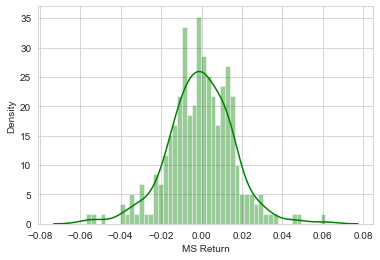

In [81]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='green', bins=50)

#### Distplot using seaborn of the 2008 returns for CitiGroup **

c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


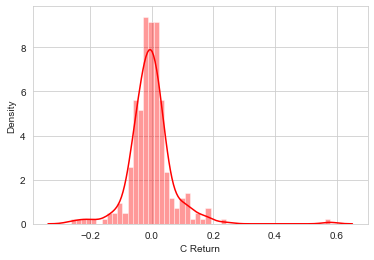

In [82]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color='red', bins=50)

#### Create a line plot showing Close price for each bank for the entire index of time. 


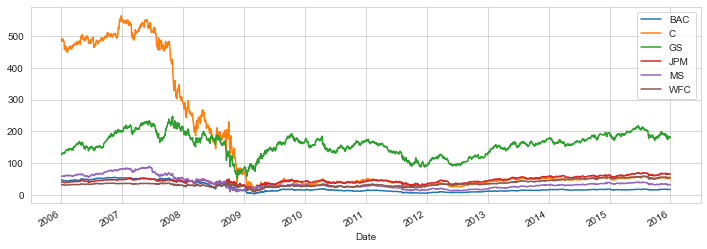

In [90]:
#Method 1 for loop
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)

plt.legend()

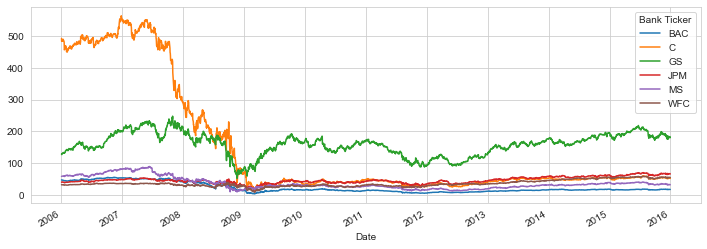

In [95]:
#Method 2 XS()o
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot(figsize=(12,4),label=tick)


In [98]:
#method 3: plotly
bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()


## Moving Averages

#### Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

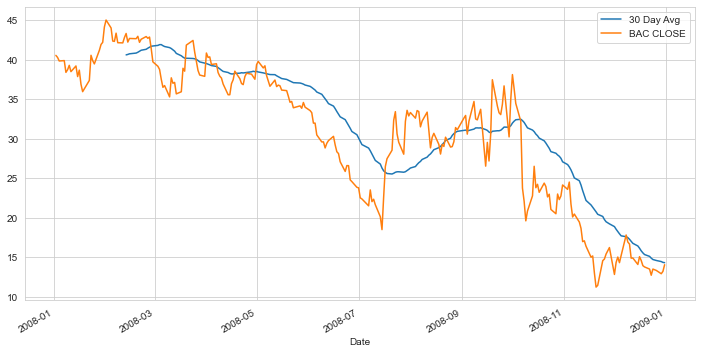

In [101]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

#### a heatmap of the correlation between the stocks Close Price

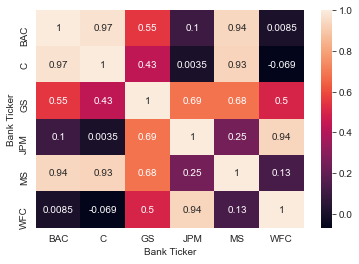

In [104]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

#### seaborn's clustermap to cluster the correlations together

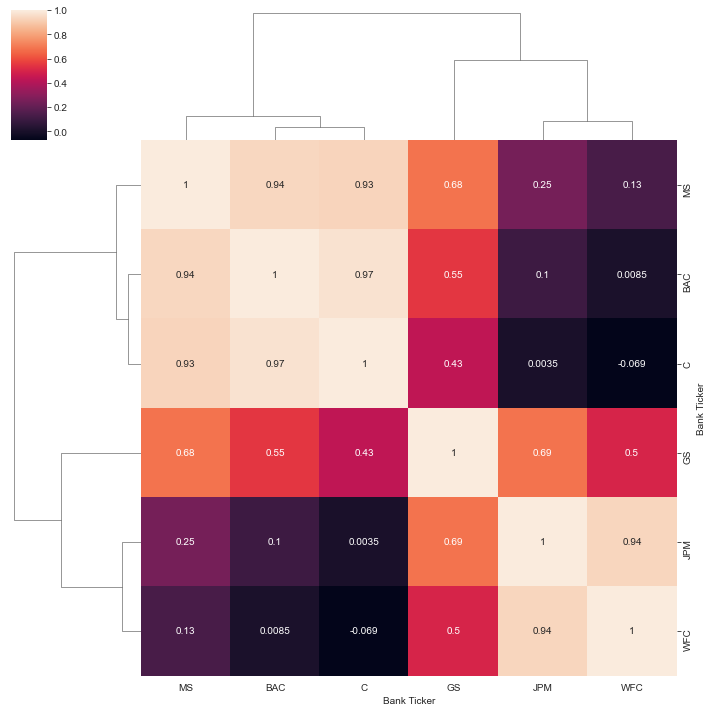

In [105]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

#### to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016

In [112]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle') 

### to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.

In [114]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[7,14,28],title='Simple Moving Averages')

### to create a Bollinger Band Plot for Bank of America for the year 2015.

In [115]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll') 